In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
pd.set_option('display.float_format', lambda x: '%.2f' % x)
salaries = pd.read_csv("2017-18_NBA_salary.csv")

## Correlación de variables
Para identificar la correlación entre las variables del Dataframe se realiza una matriz de correlación. Sin embargo, es de principal interés la variable de salario. Por lo anterior, se extrae únicamente la correlación entre salario y las demás variables, como se muestra a continuación.

In [2]:
salaries.corr()['Salary'].sort_values(ascending=False)

Salary             1.00
WS                 0.59
VORP               0.57
OWS                0.56
MP                 0.51
DWS                0.51
Age                0.34
BPM                0.31
USG%               0.30
G                  0.30
PER                0.27
AST%               0.27
OBPM               0.27
DRB%               0.20
DBPM               0.18
TS%                0.17
WS/48              0.16
TRB%               0.14
BLK%               0.05
STL%               0.04
FTr                0.02
ORB%               0.00
TOV%              -0.04
3PAr              -0.07
NBA_DraftNumber   -0.38
Name: Salary, dtype: float64

El indicador que utiliza para el cálculo de la correlación es el coeficiente de Pearson, que indica la asociación **lineal** entre dos variables. Para la intuición de la relación entre las variables, usando una matriz de correlación, es necesario tener presente las siguientes consideraciones:

* Los valores pueden estar entre -1 y +1
* Un valor igual a 0 indica que no existe una relación lineal entre las dos variables, aunque no necesariamente son independientes.
* Un valor mayor a 0 indica una correlación lineal positiva, es decir, las variables son directamente proporcionales.
* Un valor menor a 0 indica una correlación lineal negativa, es decir, las variables son inversamente proporcionales.

Además, se dice con frecuencia que dos variables están altamente correlacionadas si su coeficiente es mayor o igual que 0.7. Sin embargo, el valor de referencia también depende del área de estudio y la cantidad de elementos en el análisis.

## Gráfica de correlación
A continuación, una gráfica de la matriz de correlación:

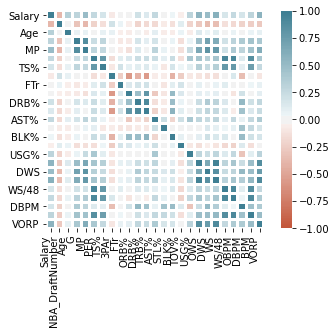

In [3]:
salary_correlation = salaries.corr()
ax = sb.heatmap(
    salary_correlation, 
    linewidth=2,
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
)
plt.show()

## Analisis de la correlación
De las condiciones del coeficiente de Pearson, inicialmente explicadas, y la gráfica de la matriz se pueden extraer las variables correlacionadas con el salario. Se muestran a continuación las variables escogidas:

In [5]:
salary_correlation = salary_correlation[(salary_correlation['Salary'] > 0.5) | (salary_correlation['Salary'] < -0.30)]
salary_correlation = salary_correlation['Salary']
salary_correlation

Salary             1.00
NBA_DraftNumber   -0.38
MP                 0.51
OWS                0.56
DWS                0.51
WS                 0.59
VORP               0.57
Name: Salary, dtype: float64

Para las variables positivamente correlacionadas fueron escogidas solamente aquellas que excedieran +0.5. En cuanto a las variables negativas, teniendo en cuenta que solo habían tres y sus valores eran más cercanos al 0 que al -1, se escogió la menor.